## Name: [    ]
## ID: [   ]

<h1><center><font color=darkred>  
    Lab 11: K-Means Clustering 
   </font></center></h1>

### Table of Contents
<ul>
<li><a href="#intro">1. Introduction to Clustering and K-Means</a></li>
<li><a href="#Kmeans">2. K-Means Clustering using Scikit-Learn</a></li>
<li><a href="#scratch">3. K-Means Clustering from Scratch</a></li>     
</ul>

<a id='intro'></a>
## 1. Introduction
### Clustering:
Is the technique to segregate Datasets into various groups, on basis of having similar features and characteristics. 
It is being used in Unsupervised Learning Algorithm in Machine Learning.<br>
<br>
Machine learning algorithms can be broadly classified into two categories: **supervised and unsupervised learning**. There are other categories also like **semi-supervised learning** and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

### K-Means Clustering:
It's the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

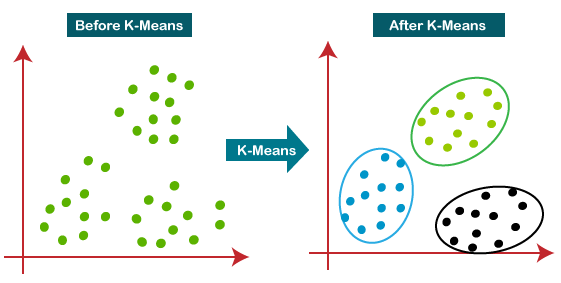

__Algorithm steps Of K Means:__<br>
1. Decide how many clusters you want, i.e. choose k. <br>
2. Randomly assign a centroid to each of the k clusters.<br>
3. Calculate the distance of all observation to each of the k centroids.<br>
4. Assign observations to the closest centroid.<br>
5. Find the new location of the centroid by taking the mean of all the observations in each cluster.<br>
6. Repeat steps 3-5 until the centroids do not change position.



### The elbow method:
The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

# <font color=darkred> Problem </font>

- Write a program to cluster the type of flower.<br>
In this Lab, We'll build a K-means algorithm to cluster the type of flower.

<a id='Kmeans'></a>
## 2. K-Means Clustering using Scikit-Learn

## Packages Needed:

In [1]:
import pandas as pd
from pandas import DataFrame 
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

## Import Dataset

In [2]:
import os
import numpy as np
from PIL import Image

def load_images_without_labels(folder_path):
    img_folder = os.path.join(folder_path, 'img')  # Folder containing the images
    images = []
    for filename in os.listdir(img_folder):
            image_path = os.path.join(img_folder, filename)
            image = Image.open(image_path)
            image_array = np.array(image)
            flattened_image = image_array.reshape(-1)
            images.append(flattened_image)
    return np.array(images)

# Load training and testing data
train_folder = './celeba_training'
test_folder = './celeba_testing'

train_images = load_images_without_labels(train_folder)
test_images = load_images_without_labels(test_folder)

# Check the shape of the loaded data
print(f'Training images shape: {train_images.shape}')
print(f'Testing images shape: {test_images.shape}')

Training images shape: (5000, 116412)
Testing images shape: (1000, 116412)


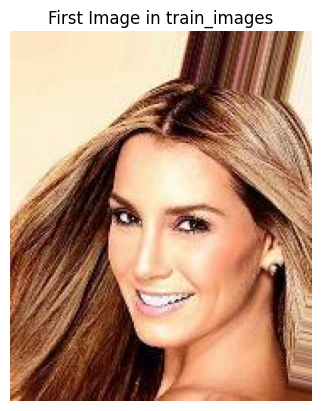

In [3]:
import matplotlib.pyplot as plt

# Assuming train_images is your dataset and each image is flattened
original_image_shape = (218, 178, 3)  # Original image dimensions

# Reshape the first image to its original dimensions
first_image = train_images[0].reshape(original_image_shape)

# Display the first image
plt.imshow(first_image.astype(np.uint8))
plt.title('First Image in train_images')
plt.axis('off')
plt.show()

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def plot_elbow_method(data, max_clusters):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

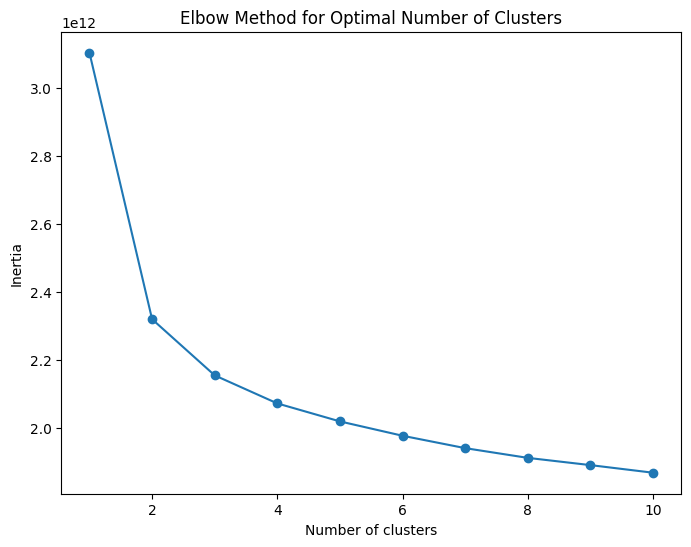

In [5]:
plot_elbow_method(train_images, max_clusters=10)

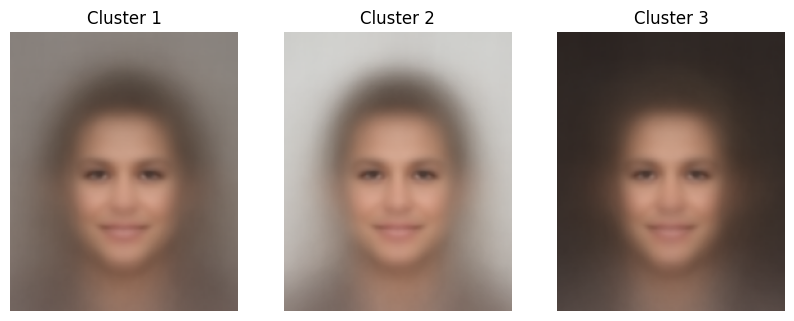

In [9]:
#i will choose 3 
num_clusters=3
# Fit K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(train_images)

# Extract cluster centers
cluster_centers = kmeans.cluster_centers_


# Display cluster centers as images
plt.figure(figsize=(10, 5))
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1)
    plt.imshow(cluster_centers[i].reshape(original_image_shape).astype(np.uint8))
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')
plt.show()

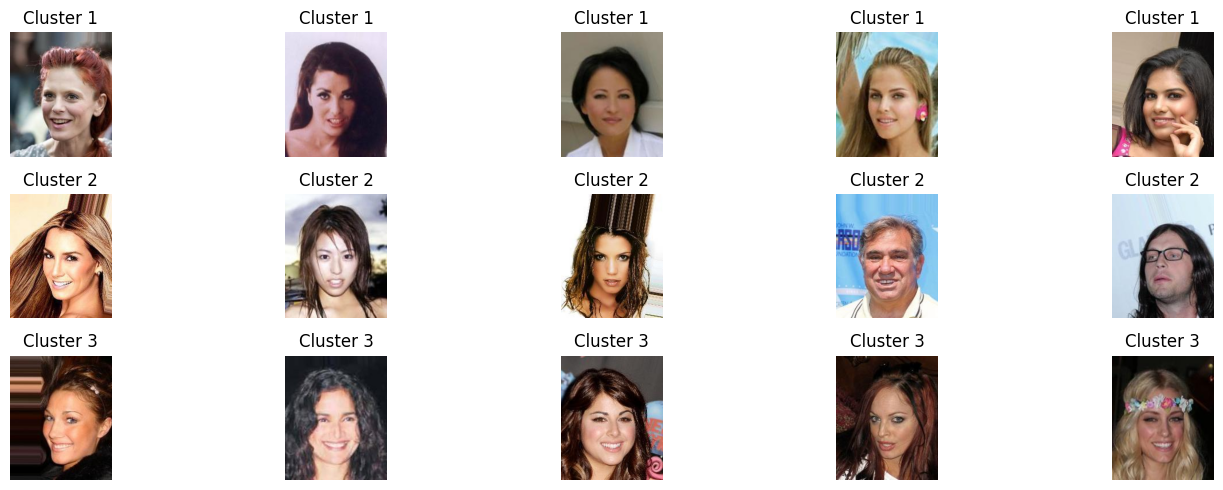

In [10]:
# Predict clusters for each image
cluster_labels = kmeans.predict(train_images)

# Display some images from each cluster
plt.figure(figsize=(15, 5))
for cluster in range(num_clusters):
    # Select images belonging to the current cluster
    cluster_images = train_images[cluster_labels == cluster]
    
    # Display the first 5 images from the current cluster
    for i in range(5):
        plt.subplot(num_clusters, 5, cluster * 5 + i + 1)
        image = cluster_images[i].reshape(original_image_shape)
        plt.imshow(image.astype(np.uint8))
        plt.title(f'Cluster {cluster + 1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

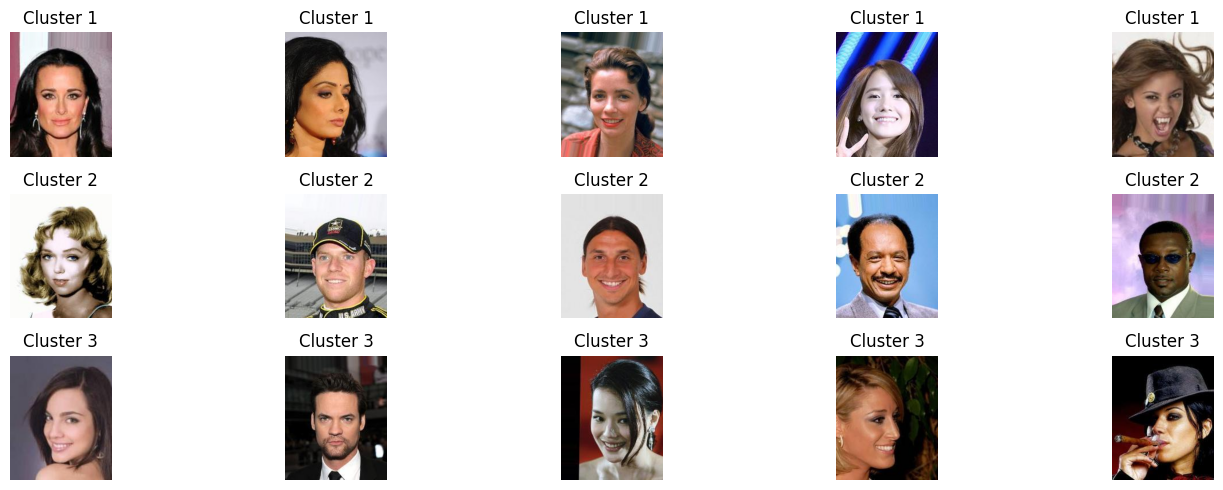

In [11]:
# Predict clusters for each image
cluster_labels = kmeans.predict(test_images)

# Display some images from each cluster
plt.figure(figsize=(15, 5))
for cluster in range(num_clusters):
    # Select images belonging to the current cluster
    cluster_images = test_images[cluster_labels == cluster]
    
    # Display the first 5 images from the current cluster
    for i in range(5):
        plt.subplot(num_clusters, 5, cluster * 5 + i + 1)
        image = cluster_images[i].reshape(original_image_shape)
        plt.imshow(image.astype(np.uint8))
        plt.title(f'Cluster {cluster + 1}')
        plt.axis('off')

plt.tight_layout()
plt.show()